# Lab | Feature engineering

- In this lab, you will use `learningSet.csv` file which you have already cloned in the previous activities. 

### Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns `GEOCODE2`, `WEALTH1`, `ADI`, `DMA`,and `MSA`.
- Use appropriate EDA technique where ever necessary.


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [99]:
data = pd.read_csv('/Users/robertkammerer/Ironhack/07_Week/day1_course/learningSet.csv')

/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [101]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object)
numerical.head()
numerical.shape

/var/folders/gg/ydzntksx7jl3t92y3_bqsw140000gn/T/ipykernel_41808/3319968365.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = data.select_dtypes(np.object)


(95412, 407)

In [102]:
numerical.isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64

In [103]:
def clean_na(df, threshold=0.25):
    nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']    
    
    # columns above threshold
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>threshold]
    list_threshold = list(columns_above_threshold['column_name'])
    
    return list_threshold

In [104]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA

In [105]:
# numerical['GEOCODE2']  --> Variable does not exist

In [106]:
numerical['WEALTH1'].unique()

array([nan,  9.,  1.,  4.,  2.,  6.,  0.,  5.,  8.,  3.,  7.])

In [107]:
# CLEAN NULL VALUES FOR WALTH1

ml = numerical[numerical['WEALTH1'].notna()].index.tolist()
numerical = numerical.loc[ml,:]
categorical = categorical.loc[ml,:]

In [108]:
numerical.shape

(50680, 407)

In [109]:
numerical['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [110]:
# Clean Null Values for ADI, DMA, MSA

ml2 = numerical[numerical['ADI'].notna()].index.tolist()
numerical = numerical.loc[ml2,:]
categorical = categorical.loc[ml2,:]

In [111]:
numerical['ADI'].value_counts()

13.0     3345
51.0     2628
65.0     1910
57.0     1537
197.0    1284
         ... 
601.0       1
139.0       1
145.0       1
161.0       1
140.0       1
Name: ADI, Length: 200, dtype: int64

In [112]:
numerical['DMA'].value_counts()

803.0    3345
602.0    2630
807.0    1910
505.0    1538
524.0    1285
         ... 
584.0       1
598.0       1
538.0       1
502.0       1
552.0       1
Name: DMA, Length: 201, dtype: int64

In [113]:
numerical['MSA'].value_counts()

0.0       9734
1600.0    2307
4480.0    2185
2160.0    1381
520.0     1108
          ... 
1480.0       1
1320.0       1
2281.0       1
1303.0       1
7610.0       1
Name: MSA, Length: 287, dtype: int64

/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

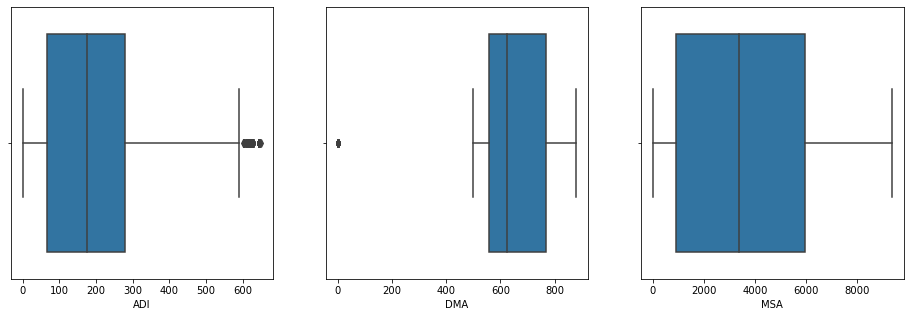

In [130]:
# Print ADI, DMA, MSA

fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.boxplot(numerical['ADI'], ax = ax[0])
sns.boxplot(numerical["DMA"], ax = ax[1])
sns.boxplot(numerical['MSA'], ax = ax[2])
plt.show()

# -> Maybe cut off outliers for DMA and ADI

In [115]:
# Use appropriate EDA technique where ever necessary.

droplist = clean_na(numerical, 0.2)
droplist = [ col for col in droplist if col not in ['WEALTH1', 'WEALTH2'] ]
droplist

['NUMCHLD',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24']

In [116]:
numerical = numerical.drop(columns=droplist, axis=1)

In [117]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3,2,0,7,8,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,3,1,23,1,16,6,0,0,0,10,21,0,28,23,32,8,1,14,1,5,0,0,7,0,0,0,0,0,1,0,0,2,84,96,3,0,0,92,65,29,9,22,3,12,23,50,69,31,0,0,0,6,35,44,0,15,22,77,17,97,92,9,2,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,26,9702,63,6,14,202.0,27,14,2.0,9111,16.0,9207,5

In [118]:
numerical.shape

(50648, 349)

In [119]:
nulllist = numerical.isna().sum()/len(numerical)

In [120]:
nulllist[notnull != 0]

AGE         0.131259
MBCRAFT     0.160263
MBGARDEN    0.160263
MBBOOKS     0.160263
MBCOLECT    0.161448
MAGFAML     0.160263
MAGFEM      0.160263
MAGMALE     0.160263
PUBGARDN    0.160263
PUBCULIN    0.160263
PUBHLTH     0.160263
PUBDOITY    0.160263
PUBNEWFN    0.160263
PUBPHOTO    0.160263
PUBOPP      0.160263
WEALTH2     0.433739
ADATE_3     0.010306
ADATE_4     0.012794
ADATE_6     0.035974
ADATE_7     0.084386
ADATE_8     0.036053
ADATE_9     0.111258
ADATE_11    0.095581
ADATE_12    0.088770
ADATE_14    0.182060
NEXTDATE    0.096628
TIMELAG     0.096628
dtype: float64

In [121]:
# to look at VarianceThresholds we need all the variable to be on the same scale
# we will use MinMaxScaler for this
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns = numerical.columns)
numerical_scaled_df.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,0.727273,0.000017,0.535736,0.463918,0.833333,1.000000,0.066390,0.000000,0.0,0.333333,0.166667,0.111111,0.2,0.0,0.0,0.0,0.222222,0.0,0.333333,0.0,0.000000,0.000000,0.151515,0.555556,0.111111,0.101695,0.020202,0.016667,1.000000,0.036585,0.042488,0.030536,1.0,0.000000,0.000000,0.543478,0.505051,0.676768,0.000000,0.0,0.313131,0.060606,0.181818,0.029851,0.060606,0.059701,0.424242,0.0,0.0,0.021053,0.0,0.012346,0.046512,0.409639,0.493976,0.518072,0.395062,0.518519,0.555556,0.450704,0.333333,0.464646,0.212121,0.134021,0.141414,0.333333,0.232323,0.20,0.065574,0.022222,0.111111,0.161616,0.363636,0.222222,0.151515,0.121212,0.010101,0.050505,0.040404,0.212121,0.757576,0.555556,0.232323,0.090909,0.696970,0.078431,0.041096,0.242424,0.487692,0.514286,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911333,0.869667,0.923077,0.769231,0.969697,0.040404,0.979798,0.030303,0.090909,0.595960,0.949495,0.888889,0.555556,0.959596,0.050505,0.040404,0.02,0.030303,0.053763,0.040404,0.020202,0.253521,0.444444,0.051020,0.000000,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.000000,0.838384,0.904762,0.829545,0.344262,0.227273,0.000000,0.000000,0.000000,0.040404,0.000000,0.000000,0.000000,0.919192,0.919192,0.919192,0.949495,0.478632,0.019969,0.911464,0.725333,0.730667,0.684000,0.691333,0.227079,0.020202,0.060606,0.020202,0.050505,0.151515,0.254545,0.26,0.357143,0.333333,0.020202,0.050505,0.020202,0.050505,0.151515,0.141414,0.28,0.263158,0.323232,0.060606,0.020202,0.666667,0.030303,0.565657,0.444444,0.090909,0.808081,0.141414,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.060606,0.000000,0.020202,0.266667,0.450704,0.179104,0.717172,0.707071,0.838384,0.585859,0.818182,0.575758,0.646465,0.575758,1.000000,1.0,0.000000,0.222222,0.242424,0.040404,0.212121,0.131313,0.046512,0.026316,0.060606,0.000000,0.040404,0.010101,0.000000,0.037975,0.010101,0.0,0.060606,0.131313,0.010101,0.060606,0.080808,0.181818,0.111111,0.093023,0.030303,0.08

In [122]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.02
# sel = VarianceThreshold () has default value for variance = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all coumns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This determines which columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled_df)
temp = sel.transform(numerical_scaled_df)
temp_df = pd.DataFrame(temp)
print(numerical_scaled_df.shape)
print(temp_df.shape)

(50648, 349)
(50648, 82)


In [123]:
# We can know what were the variances of all the columns.
sel.variances_
sel.get_feature_names_out()

array(['ODATEDW', 'DOB', 'AGE', 'INCOME', 'WEALTH1', 'MBBOOKS',
       'VIETVETS', 'WWIIVETS', 'WEALTH2', 'POP90C1', 'POP90C2', 'POP90C3',
       'ETH1', 'ETH2', 'HHN3', 'DW1', 'DW2', 'DW4', 'DW5', 'DW6', 'HV1',
       'HV2', 'HV3', 'HV4', 'HU1', 'HU2', 'HU5', 'HHD3', 'HVP1', 'HVP2',
       'HVP3', 'HVP4', 'HVP5', 'HVP6', 'HUR2', 'HUPA2', 'HUPA6', 'RP1',
       'RP2', 'RP3', 'RP4', 'MSA', 'ADI', 'IC6', 'HHAS1', 'HHAS3', 'MC1',
       'MC2', 'PEC2', 'TPE13', 'LFC6', 'LFC7', 'LFC8', 'LFC9', 'VC1',
       'VC3', 'POBC2', 'VOC2', 'HC2', 'HC4', 'HC5', 'HC6', 'HC7', 'HC8',
       'HC11', 'HC13', 'HC17', 'HC18', 'HC19', 'MHUC1', 'MHUC2',
       'ADATE_8', 'ADATE_9', 'ADATE_11', 'ADATE_12', 'CARDPROM',
       'LASTDATE', 'CONTROLN', 'TARGET_B', 'HPHONE_D', 'RFA_2F',
       'CLUSTER2'], dtype=object)

In [124]:
temp_df.columns = sel.get_feature_names_out()
temp_df.head()

,ODATEDW,DOB,AGE,INCOME,WEALTH1,MBBOOKS,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD3,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS1,HHAS3,MC1,MC2,PEC2,TPE13,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,ADATE_8,ADATE_9,ADATE_11,ADATE_12,CARDPROM,LASTDATE,CONTROLN,TARGET_B,HPHONE_D,RFA_2F,CLUSTER2
0,0.727273,0.535736,0.463918,0.833333,1.000000,0.333333,0.555556,0.111111,1.000000,1.0,0.000000,0.000000,0.676768,0.000000,0.757576,1.000000,1.000000,0.000000,0.000000,0.000000,0.911333,0.869667,0.923077,0.769231,0.969697,0.040404,0.090909,0.888889,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.838384,0.000000,0.000000,0.919192,0.919192,0.919192,0.949495,0.478632,0.019969,0.020202,0.060606,0.666667,0.565657,0.444444,0.020202,0.717172,0.646465,0.575758,1.000000,1.0,0.555556,0.111111,0.393939,0.929293,0.192308,0.262626,0.565657,0.979798,1.000000,0.000000,0.969697,0.040404,1.000000,0.000000,1.000000,0.952381,0.8,0.957447,1.0,0.666667,0.666667,0.183333,0.045226,0.774510,0.0,0.0,0.333333,0.000000
1,0.363636,0.000000,NaN,0.333333,0.111111,0.111111,0.292929,0.333333,0.111111,0.0,0.020202,0.989899,0.969697,0.020202,0.444444,0.696970,0.696970,0.060606,0.050505,0.030303,0.082833,0.091000,0.153846,0.076923,0.787879,0.222222,0.181818,0.656566,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.363636,0.020202,0.030303,0.000000,0.020202,0.090909,0.444444,0.000000,0.431644,0.323232,0.282828,0.313131,0.383838,0.626263,0.212121,0.616162,0.787879,0.626263,0.828283,1.0,0.282828,0.323232,0.848485,0.656566,0.423077,0.121212,0.232323,0.505051,0.696970,0.313131,0.000000,0.353535,0.222222,0.777778,0.171717,0.428571,0.4,0.957447,1.0,0.666667,0.333333,0.416667,0.045226,0.078617,0.0,1.0,1.000000,0.967213
2,0.090909,0.288465,0.711340,0.000000,0.444444,0.000000,0.141414,0.313131,0.000000,0.0,0.080808,0.929293,0.616162,0.000000,0.505051,0.858586,0.838384,0.040404,0.010101,0.000000,0.166667,0.210500,0.153846,0.076923,0.484848,0.525253,0.060606,0.616162,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.424242,0.000000,0.000000,0.010101,0.080808,0.171717,0.343434,0.997863,0.102919,0.272727,0.222222,0.262626,0.464646,0.545455,0.171717,0.434343,0.333333,0.313131,0.000000,1.0,0.141414,0.313131,0.676768,0.434343,0.730769,0.101010,0.191919,0.393939,0.454545,0.555556,0.454545,0.171717,0.232323,0.777778,0.222222,0.761905,0.4,0.957447,1.0,0.666667,0.333333,0.433333,0.045226,0.899764,0.0,1.0,1.000000,0.655738
3,0.000000,0.206076,0.793814,0.333333,0.222222,1.000000,0.090909,0.535354,NaN,1.0,0.000000,0.000000,0.020202,0.989899,0.575758,1.000000,0.989899,0.000000,0.000000,0.000000,0.096000,0.099000,0.307692,0.230769,0.909091,0.101010,0.000000,0.494949,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.454545,0.000000,0.000000,0.252525,0.585859,0.747475,0.838384,0.534188,0.195084,0.242424,0.353535,0.111111,0.202020,0.808081,0.010101,0.767677,0.808081,0.313131,0.818182,1.0,0.090909,0.535354,0.656566,0.454545,0.653846,0.010101,0.030303,0.060606,0.333333,0.676768,0.090909,0.727273,1.000000,0.010101,0.212121,0.285714,0.4,0.957447,1.0,0.333333,0.333333,0.700000,0.492462,0.037079,0.0,1.0,0.333333,0.409836
4,0.090909,0.618023,0.381443,0.500000,0.666667,NaN,0.363636,0.343434,0.333333,0.0,1.000000,0.000000,1.000000,0.000000,0.454545,0.757576,0.737374,0.232323,0.080808,0.030303,0.080667,0.086500,0.230769,0.230769,0.646465,0.363636,0.000000,0.616162,0.000000,0.010101,0.010101,0.111111,0.464646,0.000000,0.484848,0.010101,0.030303,0.000000,0.090909,0.505051,0.888889,0.000000,0.139785,0.181818,0.313131,0.404040,0.555556,0.454545,0.181818,0.212121,0.707071,0.535354,1.000000,1.0,0.313131,0.484848,0.777778,0.565657,0.673077,0.141414,0.191919,0.303030,0.454545,0.555556,0.595960,0.393939,1.000000,0.000000,0.979798,0.238095,0.4,0.957447,1.0,0.666667,0.333333,0.416667,0.005025,0.323895,0.0,1.0,0.000000,0.852459
